In [3]:
import os
import numpy as np 
import cv2
import requests
import sys

from PIL import Image
from io import BytesIO
from matplotlib import pyplot
%matplotlib inline

In [4]:
manTraNet_root = './'
manTraNet_srcDir = os.path.join( manTraNet_root, 'src' )
sys.path.insert( 0, manTraNet_srcDir )
manTraNet_modelDir = os.path.join( manTraNet_root, 'pretrained_weights' )

In [5]:
import modelCore
manTraNet = modelCore.load_pretrain_model_by_index( 4, manTraNet_modelDir )

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
INFO: use activation in the last CONV=None
INFO: unfreeze feature extraction part, trainable=True


In [6]:
# ManTraNet网络结构
print(manTraNet.summary(line_length=120))

________________________________________________________________________________________________________________________
Layer (type)                           Output Shape               Param #       Connected to                            
img_in (InputLayer)                    (None, None, None, 3)      0                                                     
________________________________________________________________________________________________________________________
Featex (Model)                         (None, None, None, 256)    3675181       img_in[0][0]                            
________________________________________________________________________________________________________________________
outlierTrans (Conv2D)                  (None, None, None, 64)     16384         Featex[1][0]                            
________________________________________________________________________________________________________________________
bnorm (BatchNormalization)      

In [7]:
# Image Manipulation Classification Network
IMCFeatex = manTraNet.get_layer('Featex')
print(IMCFeatex.summary(line_length=120))

________________________________________________________________________________________________________________________
Layer (type)                                          Output Shape                                    Param #           
image_in (InputLayer)                                 (None, None, None, 3)                           0                 
________________________________________________________________________________________________________________________
b1c1 (CombinedConv2D)                                 (None, None, None, 16)                          525               
________________________________________________________________________________________________________________________
b1c2 (Conv2DSymPadding)                               (None, None, None, 32)                          4640              
________________________________________________________________________________________________________________________
b2c1 (Conv2DSymPadding)         

In [8]:
from datetime import datetime 
def read_rgb_image( image_file ) :
    rgb = cv2.imread( image_file, 1 )[...,::-1]
    return rgb
    
def decode_an_image_array( rgb, manTraNet ) :
    x = np.expand_dims( rgb.astype('float32')/255.*2-1, axis=0 )
    t0 = datetime.now()
    print("start..")
    y = manTraNet.predict(x)[0,...,0]
    t1 = datetime.now()
    return y, t1-t0

def decode_an_image_file( image_file, manTraNet ) :
    rgb = read_rgb_image( image_file )
    mask, ptime = decode_an_image_array( rgb, manTraNet )
    return rgb, mask, ptime.total_seconds()

In [13]:
import os
import random
import numpy 
def get_img_list(folder):
    return [os.path.join(folder,each) for each in os.listdir(folder) if each.endswith(".jpg") or each.endswith(".png") or each.endswith(".jpeg")]
#输入：单张图像路径
#功能：显示所有的结果
def get_image_from_folders(path,xrange = None,yrange=None):
    img = Image.open(path)
    w,h = img.size
    #我发现在我的机器上不resize一下太大的话内存会爆
    img = img.resize((int(w*0.2),int(h*0.2)), Image.ANTIALIAS)
    img = np.array(img)
    print(img.shape)
    if img.shape[-1] > 3 :
        img = img[...,:3]
    ori = np.array(img)
    if xrange is not None :
        img = img[:,xrange[0]:xrange[1]]
    if yrange is not None :
        img = img[yrange[0]:yrange[1]]
    print("processing...")
    mask, ptime = decode_an_image_array( img, manTraNet )
    ptime = ptime.total_seconds()
    # show results
    if xrange is None and yrange is None :
        pyplot.figure( figsize=(15,5) )
        pyplot.title('Original Image')
        pyplot.subplot(131)
        pyplot.imshow( img )
        pyplot.title('Forged Image (ManTra-Net Input)')
        pyplot.subplot(132)
        pyplot.imshow( mask, cmap='gray' )
        pyplot.title('Predicted Mask (ManTra-Net Output)')
        pyplot.subplot(133)
        pyplot.imshow( np.round(np.expand_dims(mask,axis=-1) * img).astype('uint8'), cmap='jet' )
        pyplot.title('Highlighted Forged Regions')
        pyplot.suptitle('Decoded {} of size {} for {:.2f} seconds'.format( path, img.shape, ptime ) )
        pyplot.show()

(256, 192, 3)
processing...
start..


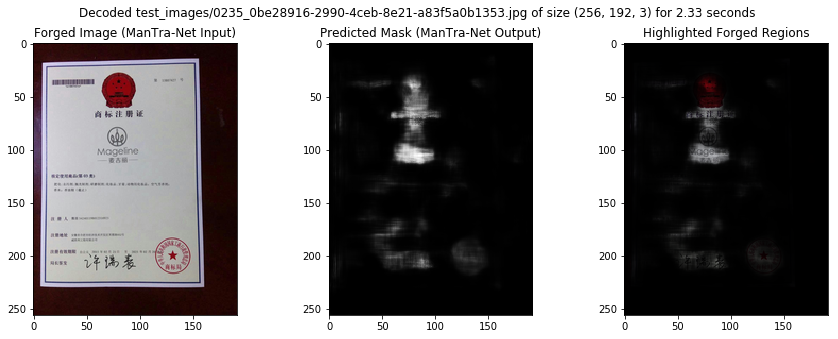

(212, 150, 3)
processing...
start..


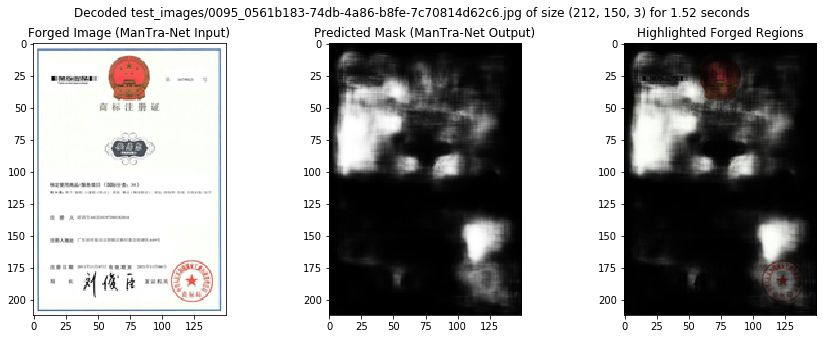

(586, 415, 3)
processing...
start..


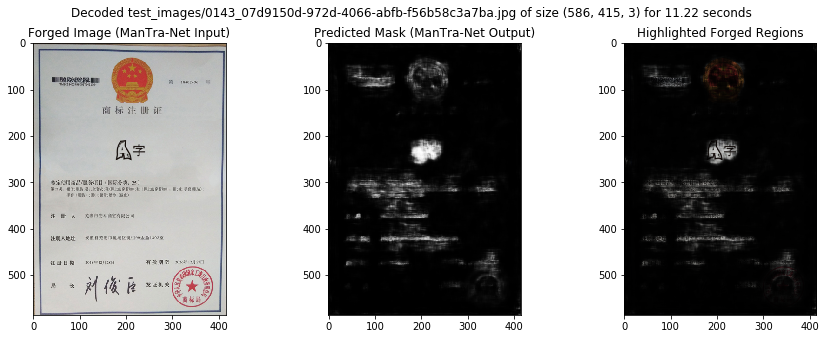

(256, 192, 3)
processing...
start..


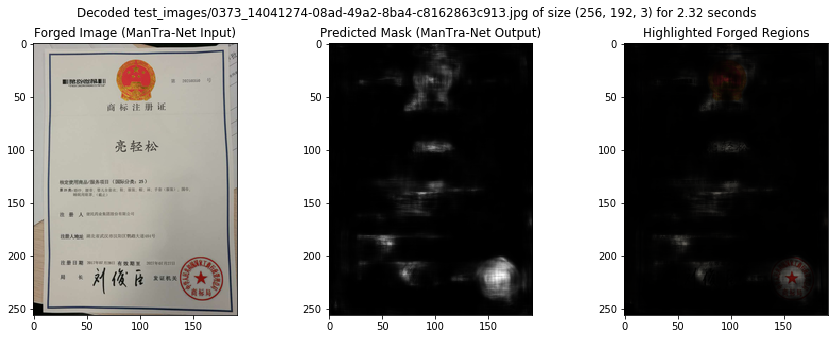

(200, 150, 3)
processing...
start..


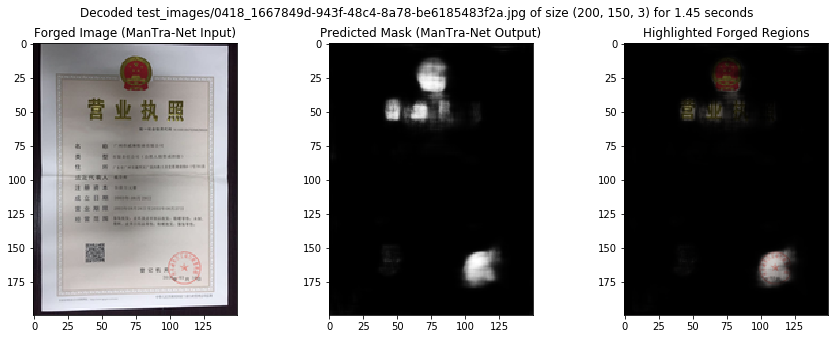

(191, 272, 3)
processing...
start..


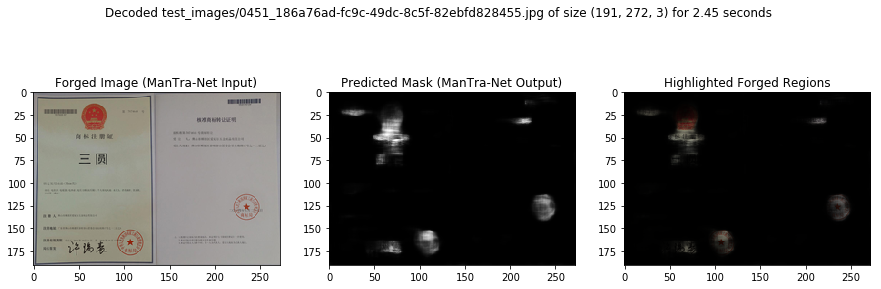

(652, 489, 3)
processing...
start..


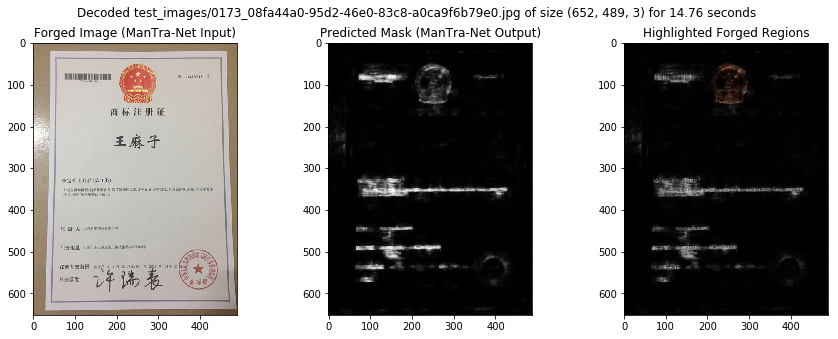

(256, 192, 3)
processing...
start..


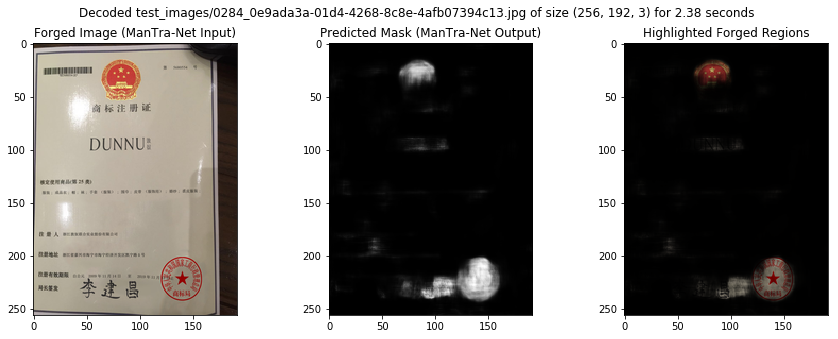

(256, 192, 3)
processing...
start..


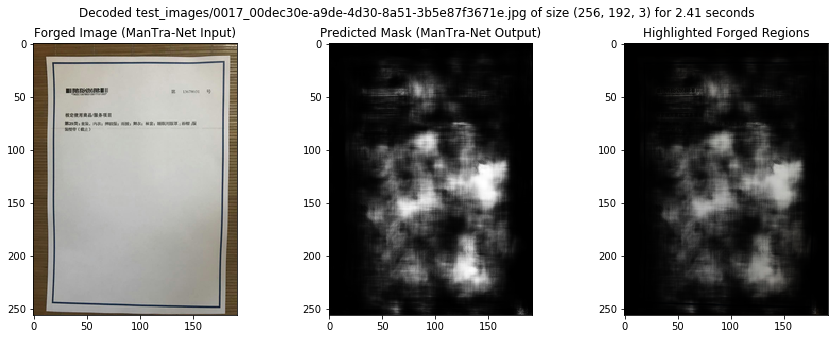

(256, 192, 3)
processing...
start..


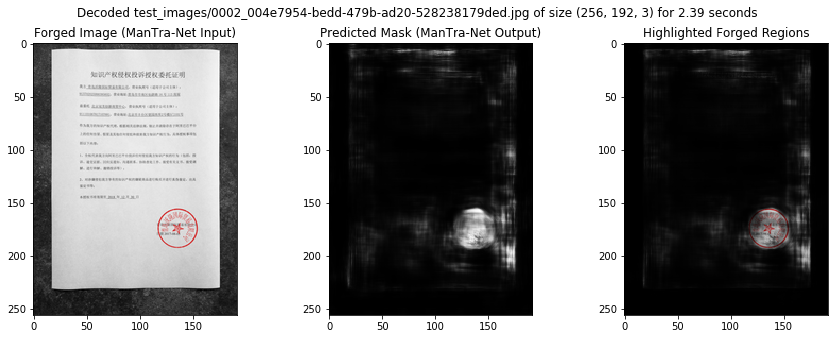

(204, 147, 3)
processing...
start..


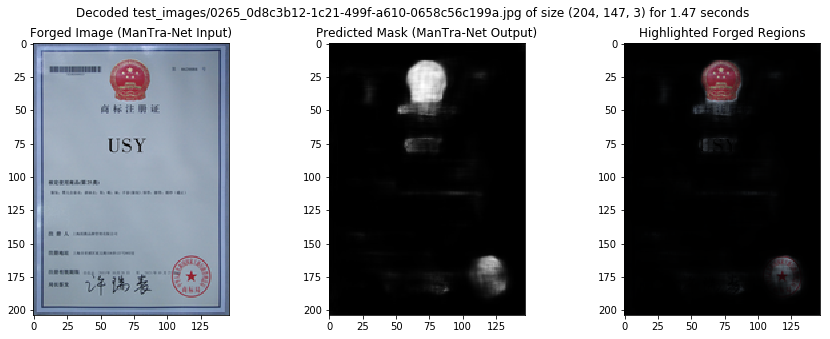

(310, 216, 3)
processing...
start..


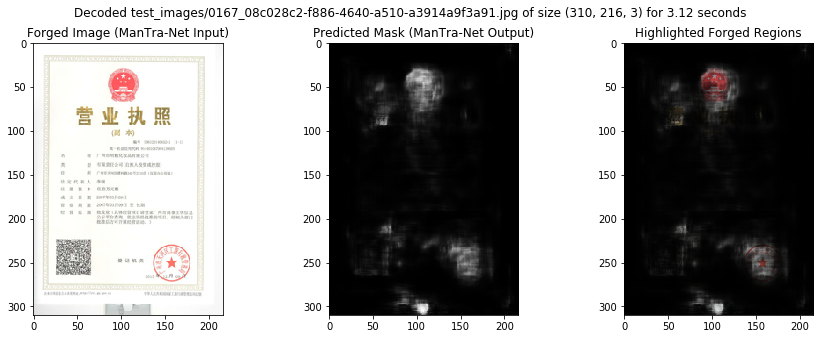

(256, 192, 3)
processing...
start..


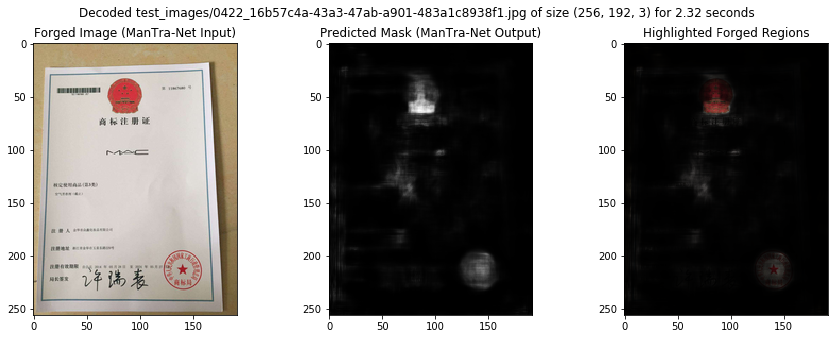

(256, 192, 3)
processing...
start..


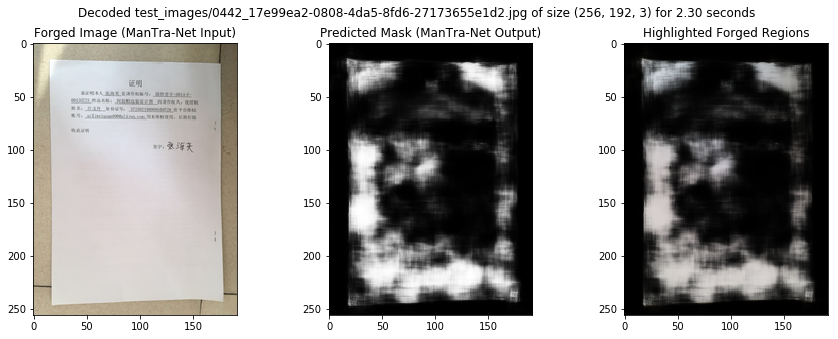

(256, 192, 3)
processing...
start..


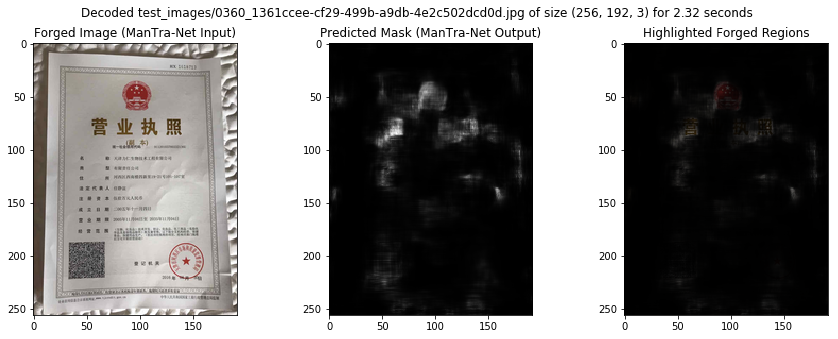

(153, 111, 3)
processing...
start..


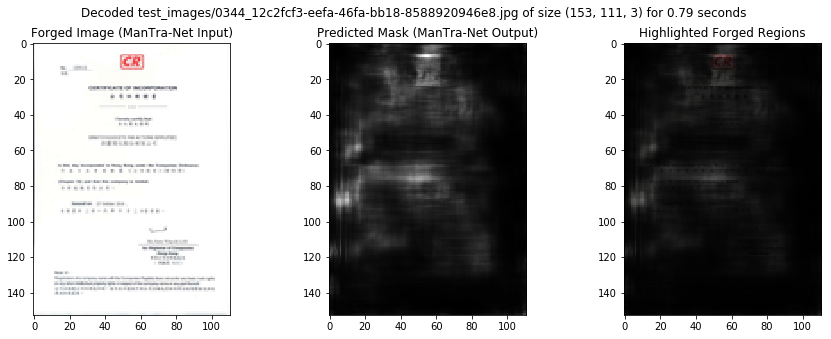

(81, 127, 3)
processing...
start..


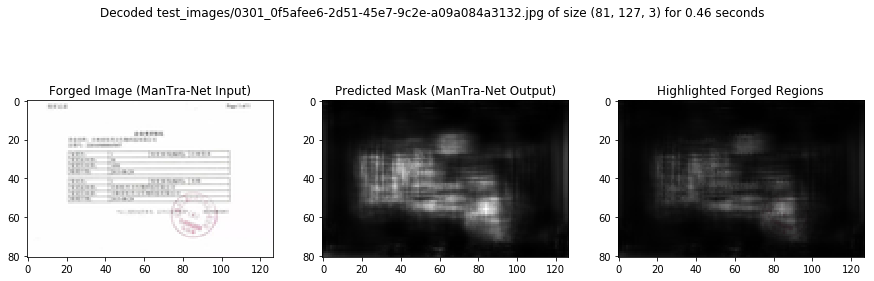

(256, 192, 3)
processing...
start..


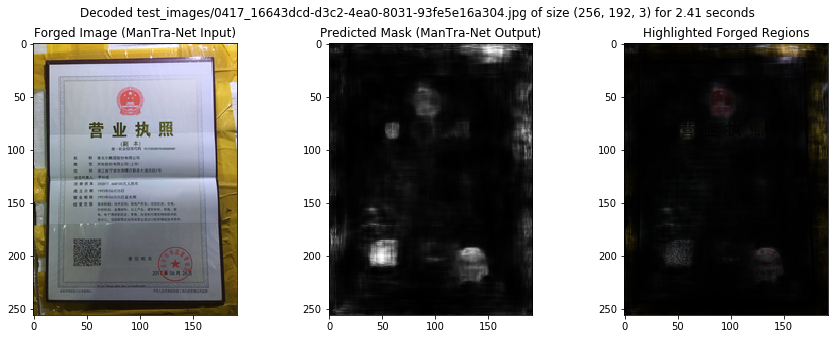

(256, 192, 3)
processing...
start..


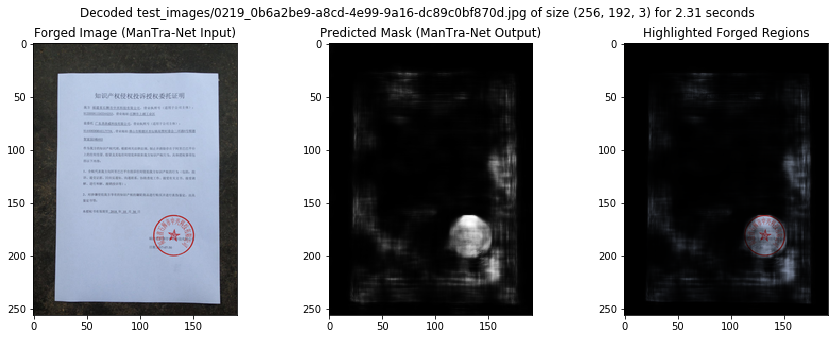

(833, 625, 3)
processing...
start..


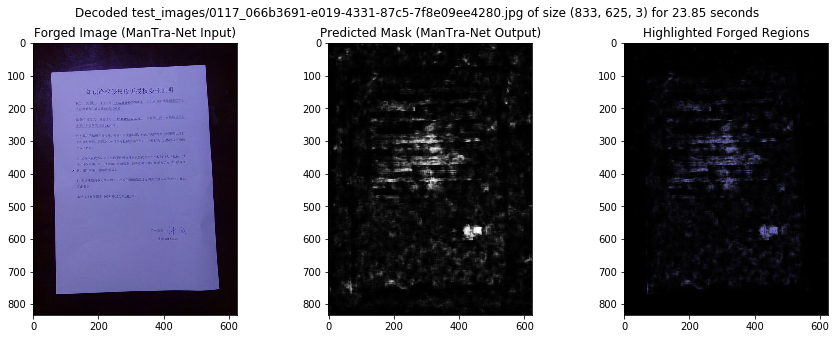

(454, 340, 3)
processing...
start..


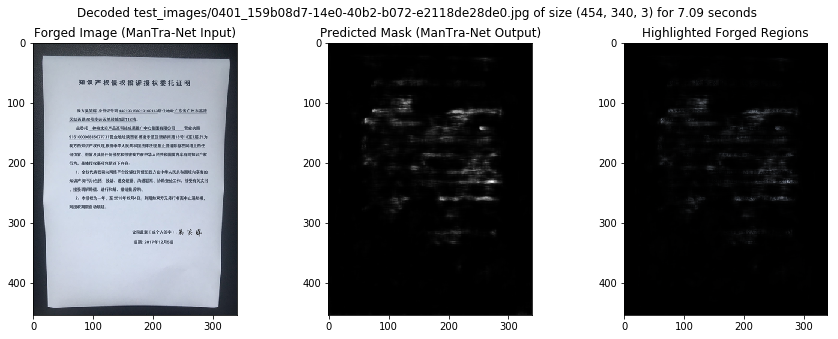

(640, 480, 3)
processing...
start..


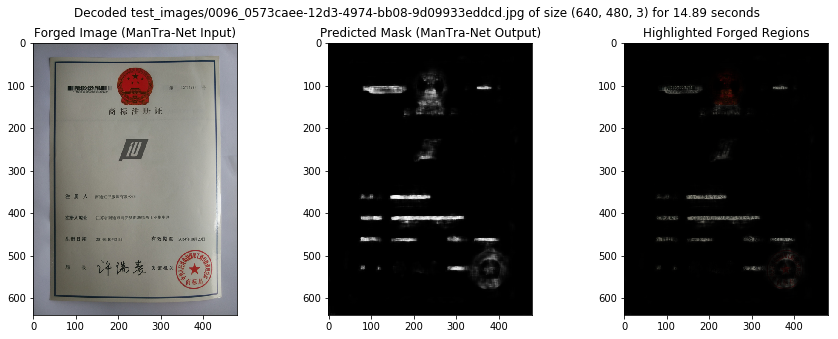

(160, 111, 3)
processing...
start..


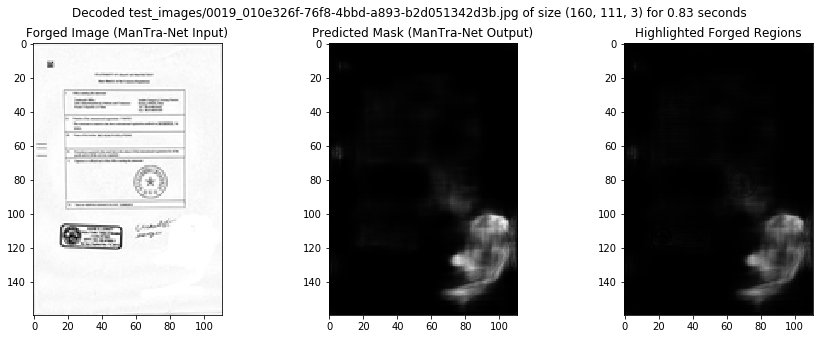

(806, 604, 3)
processing...
start..


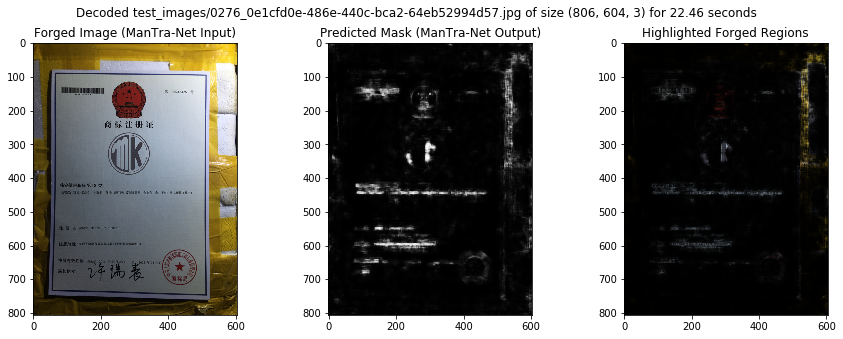

(204, 147, 3)
processing...
start..


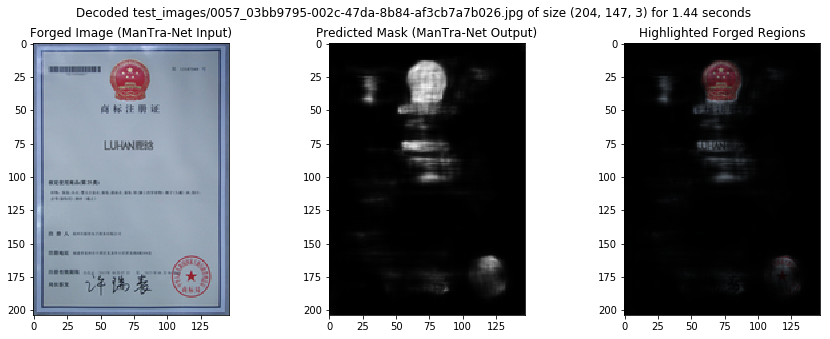

(224, 153, 3)
processing...
start..


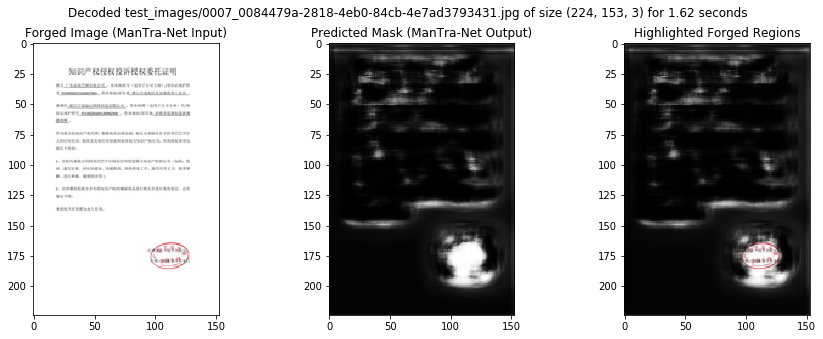

(806, 604, 3)
processing...
start..


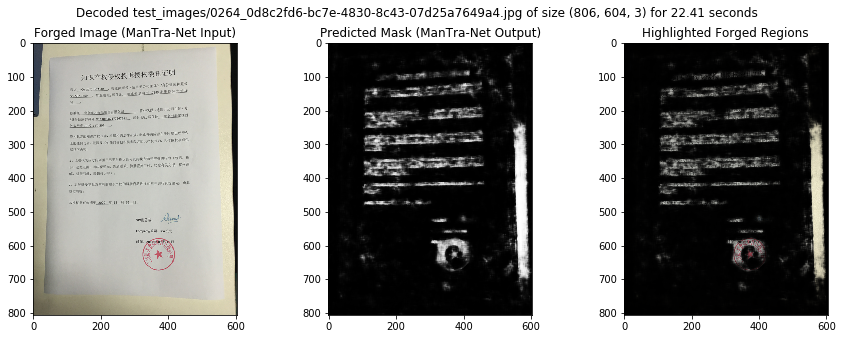

(340, 467, 3)
processing...
start..


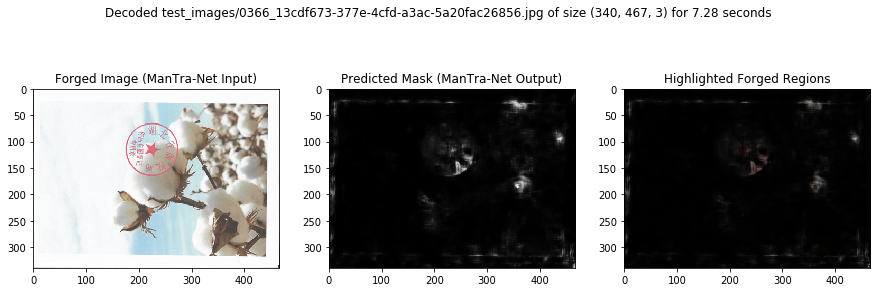

(227, 170, 3)
processing...
start..


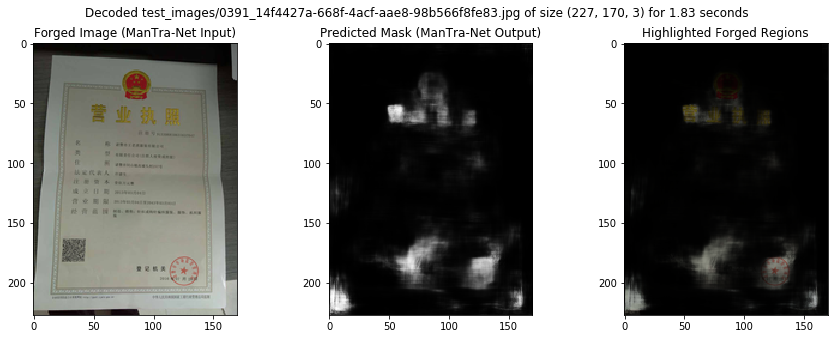

(256, 192, 3)
processing...
start..


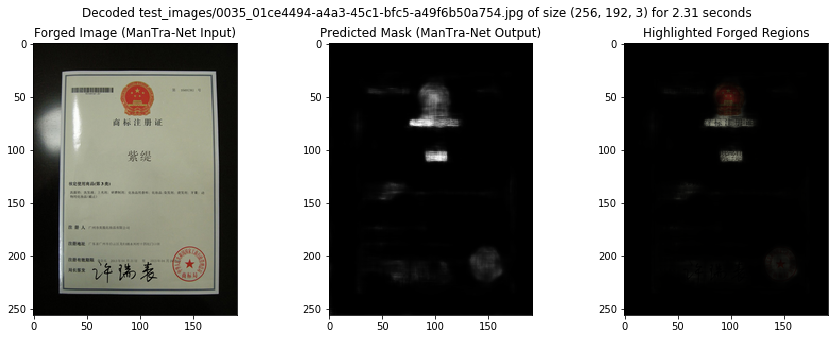

(806, 604, 3)
processing...
start..


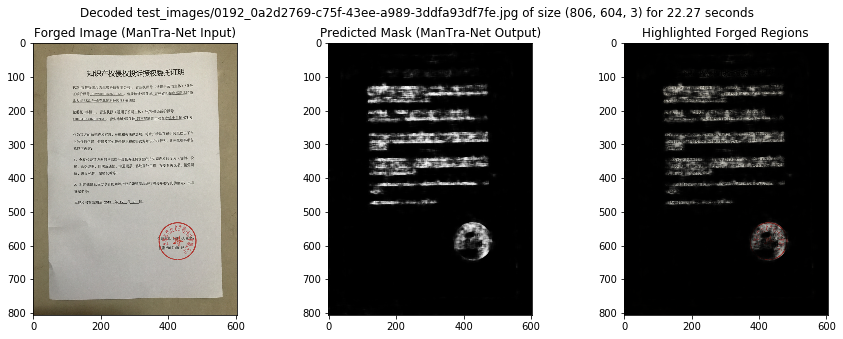

(652, 489, 3)
processing...
start..


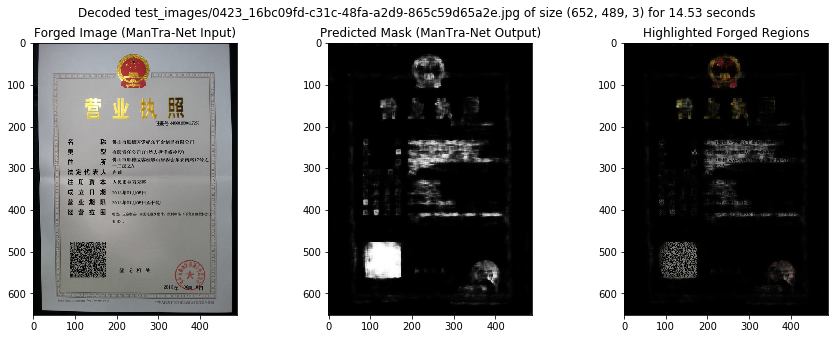

(806, 604, 3)
processing...
start..


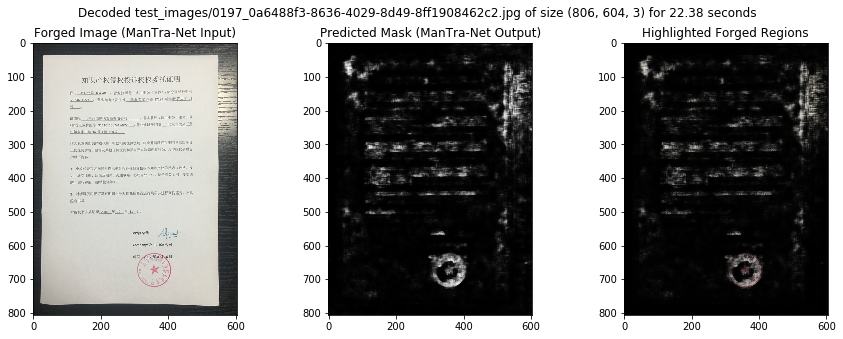

In [14]:
#获取测试文件下所有的图像路径
img_list = get_img_list("test_images/")
#开始处理
for each in img_list:
    get_image_from_folders(each)